# Детектор fake news

In [8]:
import numpy as np
import pandas as pd

In [1]:
# Установка библиотек
# turicreate - библиотека от Apple для быстрой разработки Machine Learning
# https://apple.github.io/turicreate/docs/api/
!pip install turicreate

In [10]:
#Загружаем библиотеку
import turicreate as tc

In [11]:
tc.config.set_num_gpus(-1) # Обучение на видеокарте

In [9]:
#скачивем архив с базой данных https://github.com/joolsa/fake_real_news_dataset/raw/master/fake_or_real_news.csv.zip

In [12]:
#Загрузим данные в датафрейм dataSFrame 
dataSFrame = tc.SFrame('fake_or_real_news.csv')
#или другой способ - через pd.read_csv('fake_or_real_news.csv')

Finished parsing file /Users/mari/Desktop/!!! DS/fake_or_real_news.csv

Parsing completed. Parsed 100 lines in 0.430154 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/mari/Desktop/!!! DS/fake_or_real_news.csv

Parsing completed. Parsed 6335 lines in 0.791909 secs.

In [13]:
dataSFrame

X1,title,text,label
8476,You Can Smell Hillary’sFear ...,"Daniel Greenfield, aShillman Journalism ...",FAKE
10294,Watch The Exact MomentPaul Ryan Committed ...,Google Pinterest DiggLinkedin Reddit ...,FAKE
3608,Kerry to go to Paris ingesture of sympathy ...,U.S. Secretary of StateJohn F. Kerry said Mo ...,REAL
10142,Bernie supporters onTwitter erupt in anger ...,— Kaydee King(@KaydeeKing) Novembe ...,FAKE
875,The Battle of New York:Why This Primary Matters ...,It's primary day in NewYork and front-runners ...,REAL
6903,"Tehran, USA","\nI’m not an immigrant,but my grandparents are. ...",FAKE
7341,Girl Horrified At WhatShe Watches Boyfriend Do ...,"Share This Baylee Luciani(left), Screenshot of ...",FAKE
95,‘Britain’s Schindler’Dies at 106 ...,A Czech stockbroker whosaved more than 650 ...,REAL
4869,Fact check: Trump andClinton at the ...,Hillary Clinton andDonald Trump made some ...,REAL
2909,Iran reportedly makes newpush for uranium ...,Iranian negotiatorsreportedly have made a ...,REAL


In [14]:
dataSFrame[2]

{'X1': 3608,
 'title': 'Kerry to go to Paris in gesture of sympathy',
 'text': 'U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.\n\nThe visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.\n\nThe French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said 

In [15]:
# Удалим столбец с индексами
dataSFrame = dataSFrame.remove_column('X1')
dataSFrame

title,text,label
You Can Smell Hillary’sFear ...,"Daniel Greenfield, aShillman Journalism ...",FAKE
Watch The Exact MomentPaul Ryan Committed ...,Google Pinterest DiggLinkedin Reddit ...,FAKE
Kerry to go to Paris ingesture of sympathy ...,U.S. Secretary of StateJohn F. Kerry said Mo ...,REAL
Bernie supporters onTwitter erupt in anger ...,— Kaydee King(@KaydeeKing) Novembe ...,FAKE
The Battle of New York:Why This Primary Matters ...,It's primary day in NewYork and front-runners ...,REAL
"Tehran, USA","\nI’m not an immigrant,but my grandparents are. ...",FAKE
Girl Horrified At WhatShe Watches Boyfriend Do ...,"Share This Baylee Luciani(left), Screenshot of ...",FAKE
‘Britain’s Schindler’Dies at 106 ...,A Czech stockbroker whosaved more than 650 ...,REAL
Fact check: Trump andClinton at the ...,Hillary Clinton andDonald Trump made some ...,REAL
Iran reportedly makes newpush for uranium ...,Iranian negotiatorsreportedly have made a ...,REAL


## Разделим данные на обучающую и тестовую выборку

In [16]:
#Чтобы разделить данные random_split у датафрейма dataSFrame
train, test = dataSFrame.random_split(0.7)

## Создадим модель

In [17]:
model = tc.text_classifier.create(dataset = train, # наша обучающая выборка
                                  target = 'label', # что предсказывать
                                  features =['title','text'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 4235

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 46214

Number of coefficients      : 46215

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.160373     | 0.882645          | 0.775785            |

| 1         | 4        | 1.000000  | 1.270608     | 0.988430          | 0.932735            |

| 2         | 6        | 0.743665  | 1.383752     | 0.988430          | 0.923767            |

| 3         | 7        | 0.929581  | 1.468346     | 0.998111          | 0.919283            |

| 4         | 8        | 1.000000  | 1.561596     | 0.999528          | 0.919283            |

| 9         | 15       | 1.000000  | 2.072027     | 1.000000          | 0.941704            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [28]:
#[Linear Regression] https://miro.medium.com/proxy/1*IjxpxWcKX8EJUVFBNFeKdA.gif

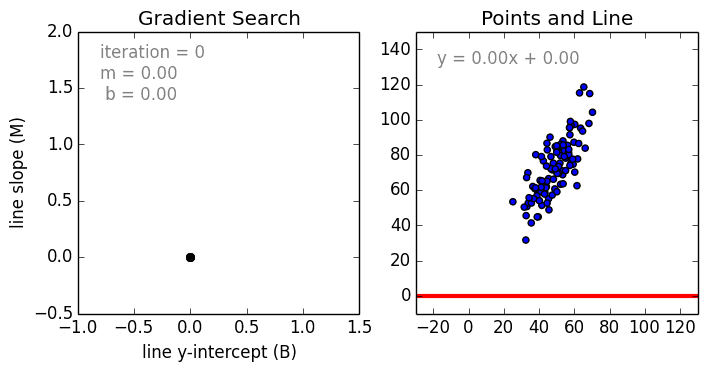

In [29]:
from IPython.display import Image
Image("/Users/mari/Desktop/!!! DS/1_IjxpxWcKX8EJUVFBNFeKdA.gif")

## Сделаем предсказание

In [30]:
# чтобы сделать предсказание нужно вызвать  функцию predict у нашей model для объекта test
test_predictions = model.predict(test)

accuracy = tc.evaluation.accuracy(test['label'], test_predictions)
print(f'Точность составила {accuracy*100}% ')

Точность составила 92.11507725093234% 


Попробуем проверить 

In [31]:
example_text = {"title": ["Путин собирается захватить мир, кто бы мог подумать?!"], 
                "text": [" Как нам недавно сказали, президент РФ Владимир Владимирович Путин собирается захватить мир используя оружие массового поражения, кроме этого он собирается использовать группу русских хакеров, которые будут проникать в ночи, в дома американцев и тайно голосовать за президента Дональда Трампа." ]}

In [32]:
example_text = {"title": ["Putin is going to take over the world, who would have thought ?!"], 
                "text": [" As we were recently told, Russian President Vladimir Putin is going to take over the world using weapons of mass destruction, in addition he is going to use a group of Russian hackers who will penetrate into the nights of Americans and secretly vote for President Donald Trump"]} 

In [33]:
example_prediction = model.classify(tc.SFrame(example_text))
print(example_prediction, flush=True)

+-------+--------------------+
| class |    probability     |
+-------+--------------------+
|  FAKE | 0.9482463669455276 |
+-------+--------------------+
[1 rows x 2 columns]



In [34]:
#Установим библиотеку для перевода
!pip install googletrans

In [35]:
# Импортируем библиотеку from googletrans import Translator
from googletrans import Translator
translator = Translator()

In [36]:
#@title Введем статью
title = "\u041F\u0443\u0442\u0438\u043D \u0441\u043E\u0431\u0438\u0440\u0430\u0435\u0442\u0441\u044F \u0437\u0430\u0445\u0432\u0430\u0442\u0438\u0442\u044C \u043C\u0438\u0440, \u043A\u0442\u043E \u0431\u044B \u043C\u043E\u0433 \u043F\u043E\u0434\u0443\u043C\u0430\u0442\u044C?!" #@param {type:"string"}
text = "\u041A\u0430\u043A \u043D\u0430\u043C \u043D\u0435\u0434\u0430\u0432\u043D\u043E \u0441\u043A\u0430\u0437\u0430\u043B\u0438, \u043F\u0440\u0435\u0437\u0438\u0434\u0435\u043D\u0442 \u0420\u0424 \u0412\u043B\u0430\u0434\u0438\u043C\u0438\u0440 \u0412\u043B\u0430\u0434\u0438\u043C\u0438\u0440\u043E\u0432\u0438\u0447 \u041F\u0443\u0442\u0438\u043D \u0441\u043E\u0431\u0438\u0440\u0430\u0435\u0442\u0441\u044F \u0437\u0430\u0445\u0432\u0430\u0442\u0438\u0442\u044C \u043C\u0438\u0440 \u0438\u0441\u043F\u043E\u043B\u044C\u0437\u0443\u044F \u043E\u0440\u0443\u0436\u0438\u0435 \u043C\u0430\u0441\u0441\u043E\u0432\u043E\u0433\u043E \u043F\u043E\u0440\u0430\u0436\u0435\u043D\u0438\u044F, \u043A\u0440\u043E\u043C\u0435 \u044D\u0442\u043E\u0433\u043E \u043E\u043D \u0441\u043E\u0431\u0438\u0440\u0430\u0435\u0442\u0441\u044F \u0438\u0441\u043F\u043E\u043B\u044C\u0437\u043E\u0432\u0430\u0442\u044C \u0433\u0440\u0443\u043F\u043F\u0443 \u0440\u0443\u0441\u0441\u043A\u0438\u0445 \u0445\u0430\u043A\u0435\u0440\u043E\u0432, \u043A\u043E\u0442\u043E\u0440\u044B\u0435 \u0431\u0443\u0434\u0443\u0442 \u043F\u0440\u043E\u043D\u0438\u043A\u0430\u0442\u044C \u0432 \u043D\u043E\u0447\u0438, \u0432 \u0434\u043E\u043C\u0430 \u0430\u043C\u0435\u0440\u0438\u043A\u0430\u043D\u0446\u0435\u0432 \u0438 \u0442\u0430\u0439\u043D\u043E \u0433\u043E\u043B\u043E\u0441\u043E\u0432\u0430\u0442\u044C \u0437\u0430 \u043F\u0440\u0435\u0437\u0438\u0434\u0435\u043D\u0442\u0430 \u0414\u043E\u043D\u0430\u043B\u044C\u0434\u0430 \u0422\u0440\u0430\u043C\u043F\u0430." #@param {type:"string"}
text = translator.translate(text,dest='en').text
title = translator.translate(title,dest='en').text
example_text = {"title": [title], "text": [text]}

In [37]:
example_prediction = model.classify(tc.SFrame(example_text))
print(example_prediction, flush=True)

+-------+-----------------+
| class |   probability   |
+-------+-----------------+
|  FAKE | 0.9523482667871 |
+-------+-----------------+
[1 rows x 2 columns]



In [38]:
test[2]

{'title': '10 Ways America Is Preparing for World War 3',
 'text': "October 31, 2016 at 4:52 am \nPretty factual except for women in the selective service. American military is still voluntary only and hasn't been a draft since Vietnam war. The comment was made by a 4 star general of the army about drafting women and he said it to shut up liberal yahoos.\ufeff",
 'label': 'FAKE'}

In [39]:
model.classify(test[2])

class,probability
FAKE,0.9964885113140147


In [40]:
test[100]

{'title': 'Pope Francis implores Congress to accept immigrants as their own',
 'text': 'Pope Francis, making history’s first papal address to the U.S. Congress, on Thursday implored America’s leaders to accept those born in other countries as their own children, urging lawmakers to set aside political differences and embrace people who “travel north in search of a better life.”\n\nThe pope wrapped traditional Catholic teachings into a celebration of American icons including Abraham Lincoln and Martin Luther King Jr., drawing lessons from their work to gently but firmly push Congress to move beyond the partisan paralysis that has blocked progress on immigration reform, climate change and other issues.\n\n“Each son or daughter of a given country has a mission, a personal and social responsibility,” the 78-year-old pontiff said in heavily accented English. “Your own responsibility as members of Congress is to enable this country, by your legislative activity, to grow as a nation.”\n\nPres

In [41]:
model.classify(test[100])

class,probability
REAL,1.0


In [42]:
#потестируем точность модели на переводном тексте

In [43]:
title = translator.translate(test[100]['title'],dest='ru').text
title

'Франциск умоляет Конгресс принять иммигрант как свои собственные'

In [44]:
text = translator.translate(test[100]['text'],dest='ru').text
text

"Франциск, делая первый папский адрес истории к Конгрессу США, в четверг умоляли лидеров Америки, чтобы принять тех, кто родился в других странах, как своих собственных детей, призывая законодателей отложить в сторону политические разногласия и принять людей, которые «Путешествие на север в поисках лучшей жизни «.\n\nПапа завернутые традиционные католические учения в праздник американских икон, включая Авраама Линкольна и Мартина Лютера Кинга, извлекая уроки из своей работы, чтобы мягко, но твердо нажать Конгресс выйти за пределы партизанского паралича, который блокировал прогресс в иммиграционной реформы, изменения климата и другие вопросы.\n\n«Каждый сын или дочь данной страны имеет миссию, личную и социальную ответственность,» сказал 78-летний понтифик в сильно акцентировано английский. «Ваша собственная ответственность как члены Конгресса, чтобы включить эту страну, по вашей законотворческой деятельности, расти как нация.»\n\nПрезидент Обама наблюдал речь по телевидению, по словам 

In [45]:
example_text = {"title": [title], "text": [text]}

In [47]:
example_prediction = model.classify(tc.SFrame(example_text))
print(example_prediction)

+-------+--------------------+
| class |    probability     |
+-------+--------------------+
|  FAKE | 0.9999913330634747 |
+-------+--------------------+
[1 rows x 2 columns]

